In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class PolynomialReg:
    def __init__(self, lr=0.01, deg=None, pretrained_weights=None):
        self.lr = lr           
        self.deg = deg
        self.w = pretrained_weights if pretrained_weights else np.random.rand(deg + 1, 1) # 1 for bias
        if pretrained_weights:
            if deg+1 != len(pretrained_weights):
                raise ValueError("weight and degree dosent match. weights should be +1 bigger than degree")
        

    def fix_input(self, x):
        x_new = x
        for i in range(1, self.deg):
            new_col = x ** (i+1)
            x_new = np.append(x_new, new_col.reshape(-1, 1), axis=1)
        x_new = np.append(x_new, np.ones((x_new.shape[0], 1)), axis = 1) # add ones to x for bias as last column


        # second implementation which look better
        # x_new = np.ones((len(x), 1))
        # for i in range(self.deg):
        #     new_col = x ** (i + 1)
        #     x_new = np.append(x_new, new_col, axis=1)
        # Actually it dosent matter wether to put bias at end or begin of x_matrix, you just need to remember that
        # wherever you put it, your bias is correspanding to it in your weights vector! 
        
    
        return x_new
        
    
    def cost(self, x, y):
        x_new = self.fix_input(x)
        # MSE loss function
        y_hat = np.dot(x_new, self.w)
        return np.mean((y - y_hat) ** 2)

    
    def train(self, x, y):
        x_new = self.fix_input(x)
        y_hat = np.dot(x_new, self.w)
        error = y - y_hat
        # Gradients of MSE: -2 * x * error / len (x) 
        grads = (-2/x_new.shape[0]) * (np.dot(x_new.T, error))
        self.w = self.w - (grads * self.lr)

    
    def predict(self, x):
        x_new = self.fix_input(x)
        return np.dot(x_new, self.w)

    
    def params(self):
        return self.w

In [3]:
df = pd.read_csv("HW_x_2d.csv")

In [4]:
df

,x1,x2,y
0,-3.141593,-3.141593,-0.774468
1,-3.141593,-3.135303,-0.943813
2,-3.141593,-3.129014,-0.181626
3,-3.141593,-3.122724,-0.127143
4,-3.141593,-3.116435,-0.963228
...,...,...,...
995,-3.141593,3.116435,-0.577353
996,-3.141593,3.122724,-0.180661
997,-3.141593,3.129014,-1.148815
998,-3.141593,3.135303,-0.610177


In [5]:
df = df.drop(columns="x1") # get rid of wrong data in our dataset

In [6]:
df

,x2,y
0,-3.141593,-0.774468
1,-3.135303,-0.943813
2,-3.129014,-0.181626
3,-3.122724,-0.127143
4,-3.116435,-0.963228
...,...,...
995,3.116435,-0.577353
996,3.122724,-0.180661
997,3.129014,-1.148815
998,3.135303,-0.610177


In [7]:
df = df.sample(frac=1)

In [16]:
x = np.array(df["x2"]).reshape(-1, 1)
y = np.array(df["y"]).reshape(-1, 1)

validation_point = int((x.shape[0]*0.8))

x_train = x[:validation_point]
y_train = y[:validation_point]
x_valid = x[validation_point:]
y_valid = y[validation_point:]

In [17]:
poly = PolynomialReg(lr=0.00009, deg=5)
poly.params(), poly.cost(x, y)

#0.000007

(array([[0.20058087],
        [0.01863222],
        [0.41764932],
        [0.5271292 ],
        [0.51988569],
        [0.44999671]]),
 3144.6937374862787)

Epoch: 50 Train_Loss: 0.1944134535322383 Validation_Loss: 0.19896781725892537
Epoch: 100 Train_Loss: 0.194172244888116 Validation_Loss: 0.19873586034932345
Epoch: 150 Train_Loss: 0.1939330015403632 Validation_Loss: 0.1985053774641137
Epoch: 200 Train_Loss: 0.19369566709088593 Validation_Loss: 0.1982763395435964
Epoch: 250 Train_Loss: 0.19346018822146022 Validation_Loss: 0.19804871850068875
Epoch: 300 Train_Loss: 0.1932265144339668 Validation_Loss: 0.19782248712951783
Epoch: 350 Train_Loss: 0.19299459781922895 Validation_Loss: 0.19759761902935893
Epoch: 400 Train_Loss: 0.19276439285095592 Validation_Loss: 0.19737408854144115
Epoch: 450 Train_Loss: 0.19253585620173774 Validation_Loss: 0.19715187069651344
Epoch: 500 Train_Loss: 0.19230894657842043 Validation_Loss: 0.1969309411713743
Epoch: 550 Train_Loss: 0.19208362457452885 Validation_Loss: 0.19671127625284135
Epoch: 600 Train_Loss: 0.19185985253769558 Validation_Loss: 0.19649285280786574
Epoch: 650 Train_Loss: 0.19163759445031198 Valida

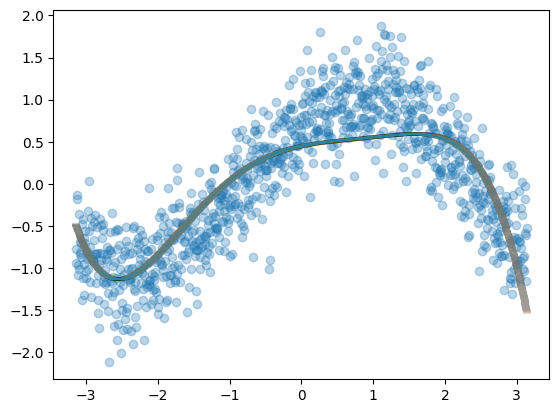

In [26]:
loss_train = []
loss_valid = []
plt.scatter(x, y, alpha=0.3)

for i in range(1000):
    poly.train(x_train, y_train)
    loss_train.append(poly.cost(x_train, y_train))
    loss_valid.append(poly.cost(x_valid, y_valid))
    if (i + 1) % 50 == 0:
        plt.scatter(x, poly.predict(x), alpha=0.06, marker='_')
        print("Epoch:", i+1,"Train_Loss:", poly.cost(x_train, y_train), "Validation_Loss:", poly.cost(x_valid, y_valid))
print("The Chart is showing Training Curves")
print("These are the weights:\n", poly.params())

our final loss in validation set: 0.19943627493269944
This Chart shows how good our curve is on validation set


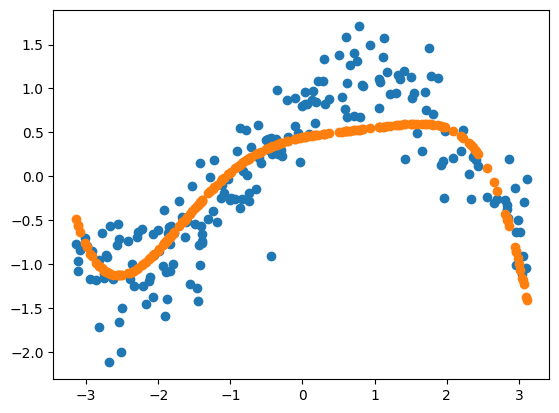

In [23]:
p = poly.predict(x_valid)
plt.scatter(x_valid, y_valid)
plt.scatter(x_valid, p)
print("our final loss in validation set:", poly.cost(x_valid, y_valid))
print("This Chart shows how good our curve is on validation set")